In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigmoid(gamma):
    return 1/(1 + np.exp(-1*gamma))

def costfunc(h, y, theta, lam, s1, s2, s3):
    m= h.shape[0]
    t1size = s2*(s1+1)
    t2size = s3*(s2+1)
    theta1 = theta[0:t1size].reshape(s2, s1+1)
    theta2 = theta[t1size:].reshape(s3, s2+1)
    theta1reg = theta1[:, 1:]
    theta2reg = theta2[:, 1:]
    
    J = -(sum(np.multiply(y, np.log(h))) + sum(np.multiply(1-y, np.log(1-h))) )/m + lam*(sum(theta1reg**2) + sum(theta2reg**2))/(2*m)
    return J[0]

def XORGradDesc(X, y, alpha = 5, niter = 10000):
    
    JHist = np.zeros(shape = (1, niter)).squeeze()
    m = X.shape[0]
    X = np.insert(X, 0, values = 1, axis = 1)
    s1 = X.shape[1]-1
    s2 = 2
    s3 = 1
    
    #Random intitialisation of theta
    epsilon = 0.00001
    theta1 = np.random.uniform(size = (s2,s1+1))
    theta2 = np.random.uniform(size = (s3,s2+1))    
    
    #Unrolling theta
    t1 = theta1.reshape(-1,1)
    t2 = theta2.reshape(-1,1)
    theta = np.row_stack((t1, t2)).squeeze()
    
    
    #Gradient Descent
    
    for i in range(0, niter):
    
        #Forward Propagation
        a2 = sigmoid(np.dot(X, theta1.transpose()))
        a2bias = np.insert(a2, 0, values = 1, axis = 1)

        a3 = sigmoid(np.dot(a2bias, theta2.transpose()))
        h = a3

        lam = 0.00001*m/alpha

        #Cost Function
        JHist[i] = costfunc(h, y, theta, lam, s1, s2, s3)


        #Backpropagation
        delta3 = h-y
        delta2 = (delta3*theta2)[:, 1:]
        delta2 = np.multiply(delta2, a2)
        delta2 = np.multiply(delta2, 1-a2)

        Delta1 = np.dot(delta2.transpose(), X)
        Delta2 = np.dot(delta3.transpose(), a2bias)
        
        
        #Calculating gradient
        regt1 = np.insert(theta1[:, 1:], 0, values = 0, axis = 1)
        regt2 = np.insert(theta2[:, 1:], 0, values = 0, axis = 1)
        D1 = (Delta1 + (lam*regt1))/m
        D2 = (Delta2 + (lam*regt2))/m
        
        d1 = D1.reshape(-1, 1)
        d2 = D2.reshape(-1, 1)
        grad = np.concatenate((d1,d2)).squeeze()

        #Updating theta via Gradient Descent
        theta = theta - alpha*grad
        theta1 = theta[0:s2*(s1+1)].reshape(s2, s1+1)
        theta2 = theta[s2*(s1+1):].reshape(s3, s2+1)
        
    return (theta, JHist)

[ -4.21513722  -7.92193914   7.79981836   4.03131674  -7.78427753
   7.98544093  -8.4111088  -17.5133547   17.17899149]


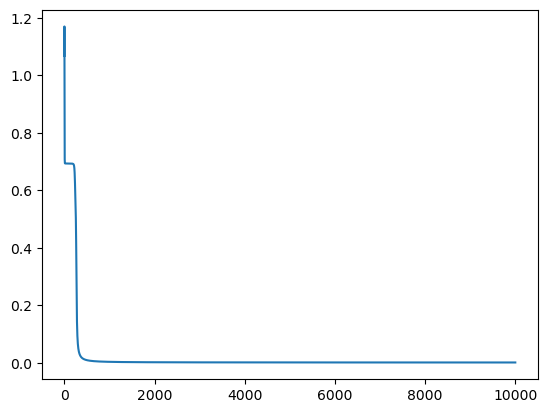

In [9]:
X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)
Y = np.array([1,0,0,1]).reshape(4,1)
(theta, JHist) = XORGradDesc(X, Y, 5, 10000)
plt.plot([i for i in range(0,10000)], JHist)
print(theta)